# Introdução


A Conab realiza o acompanhamento constante da safra de grãos, monitorando as condições de desenvolvimento das principais culturas do país, abrangendo os seguintes produtos: 
    algodão, amendoim, arroz, aveia, canola, centeio, cevada, feijão, girassol, mamona, milho, soja, sorgo, trigo e triticale.

A partir deste levantamento, a Companhia produz relatórios com diversos dados que envolvem custos de produção,
custos variáveis, entre outros.

O objetivo desse estudo é utilizar técnicas de machine learning para analisar os dados de custo de produção,
para o produto arroz, ao longo dos anos de 2018-2021. A partir dessas análises, realizar predições para essa cultura, em vários Estados brasileiros.

## Dados

Os dados foram obtidos a partir da plataforma online da Conab.

## Etapas

* Obtenção dos Dados
* Análise Exploratória e Visualização dos dados
* Pré-processamento
* Machine Learning - Análise por Série Temporal
* Conclusões

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv ('CustoArroz.csv', sep = ';', encoding = 'ISO-8859-1')

In [3]:
df

,empreendimento,Ano,produto,id_produto,safra,uf,municipio,cod_ibge,unidade_comercializacao,vlr_custo_variavel_ha,vlr_custo_variavel_unidade,vlr_custo_fixo_ha,vlr_custo_fixo_unidade,vlr_renda_fator_ha,vlr_renda_fator_unidade
0,AGRICULTURA EMPRESARIAL,2018,ARROZ,4686,TODAS,MA,BALSAS-MA ...,2101400,60 kg,1441.85,36.03,418.98,10.47,318.61,7.96
1,AGRICULTURA EMPRESARIAL,2018,ARROZ,4685,TODAS,MT,SORRISO-MT ...,5107925,60 kg,2211.92,36.86,477.26,7.97,472.98,7.88
2,AGRICULTURA EMPRESARIAL,2018,ARROZ,4685,TODAS,RR,BOA VISTA-RR ...,1400100,60 kg,4488.58,33.67,373.66,2.80,256.22,1.93
3,AGRICULTURA EMPRESARIAL,2018,ARROZ,11159,TODAS,RS,CACHOEIRA DO SUL-RS ...,4303004,50 kg,5289.25,36.78,674.95,4.70,794.72,5.52
4,AGRICULTURA EMPRESARIAL,2018,ARROZ,11159,TODAS,RS,PELOTAS-RS ...,4314407,50 kg,5573.07,35.48,441.20,2.82,563.16,3.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,AGRICULTURA EMPRESARIAL,2021,ARROZ,4685,TODAS,MT,SORRISO-MT ...,5107925,60 kg,5398.88,99.67,2047.19,37.79,891.18,16.45
132,AGRICULTURA EMPRESARIAL,2021,ARROZ,4685,TODAS,RR,BOA VISTA-RR ...,1400100,60 kg,9322.35,69.92,890.45,6.68,223.98,1.68
133,AGRICULTURA EMPRESARIAL,2021,ARROZ,11159,TODAS,RS,PELOTAS-RS ...,4314407,50 kg,10109.48,63.18,2674.91,16.72,196.35,1.23
134,AGRICULTURA EMPRESARIAL,2021,ARROZ,11159,TODAS,RS,SANTO ANTÔNIO DA PATRULHA-RS ...,4317608,50 kg,9341.11,62.27,2863.01,19.09,215.01,1.43


In [4]:
df = df.drop(columns=['empreendimento','produto', 'id_produto','safra','municipio','cod_ibge','unidade_comercializacao'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ano                         136 non-null    int64  
 1   uf                          136 non-null    object 
 2   vlr_custo_variavel_ha       136 non-null    float64
 3   vlr_custo_variavel_unidade  136 non-null    float64
 4   vlr_custo_fixo_ha           136 non-null    float64
 5   vlr_custo_fixo_unidade      136 non-null    float64
 6   vlr_renda_fator_ha          136 non-null    float64
 7   vlr_renda_fator_unidade     136 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.6+ KB


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


2021    42
2020    35
2018    33
2019    26
Name: Ano, dtype: int64


C:\Users\Bianca\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


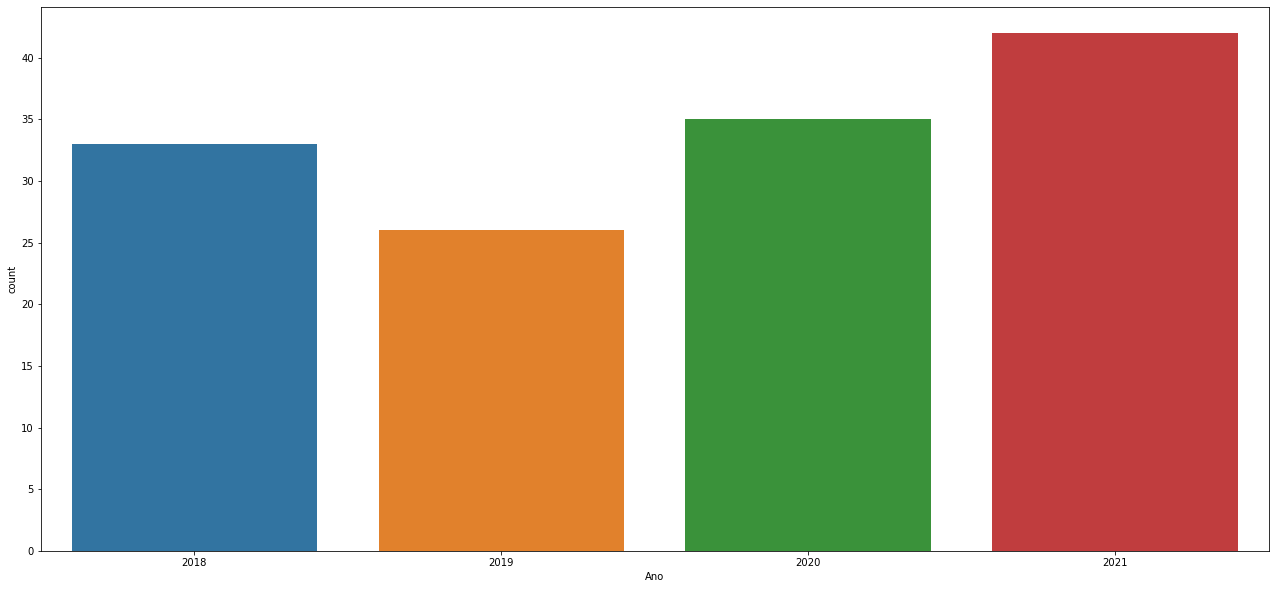

In [7]:
# Maiores verificações no ano de 2021

print(df['Ano'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(df['Ano'])
plt.show()

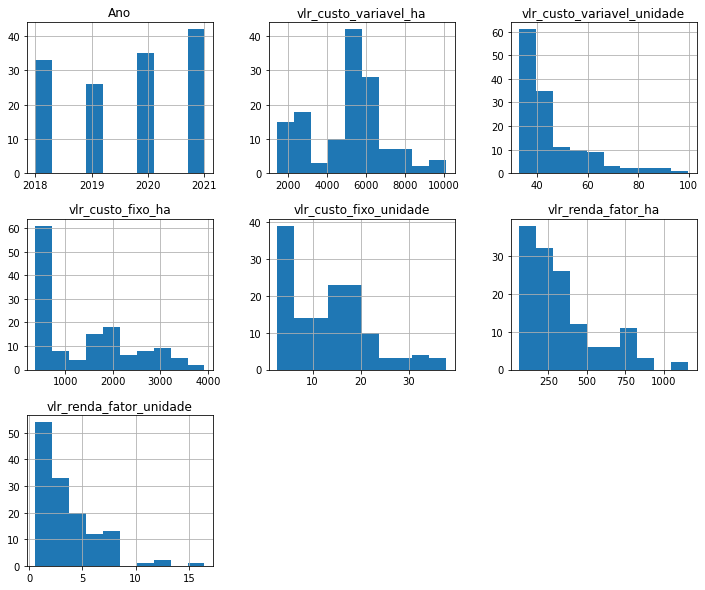

In [8]:
df.hist (figsize = (12, 10));

In [9]:
df_plot = df.groupby ('Ano'). vlr_custo_variavel_ha.sum(). reset_index () 
df_plot

,Ano,vlr_custo_variavel_ha
0,2018,154271.89
1,2019,118034.45
2,2020,157937.15
3,2021,260483.63


In [10]:
df_plot = df.groupby ('uf'). vlr_custo_variavel_ha.sum(). reset_index () 
df_plot

,uf,vlr_custo_variavel_ha
0,MA,35466.75
1,MS,78019.40
2,MT,62790.35
3,RR,92212.77
4,RS,422237.85


In [11]:
myred='#CD5C5C'
myblue='#6495ED'
mygreen='#90EE90'
cols= [myred, myblue,mygreen]

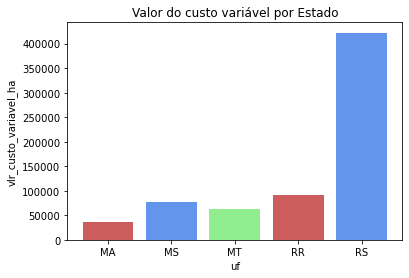

In [12]:
x =df_plot['uf']
y=df_plot['vlr_custo_variavel_ha']
plt.bar(x,y,color=cols);
plt.title('Valor do custo variável por Estado');
plt.xlabel('uf');
plt.ylabel('vlr_custo_variavel_ha');

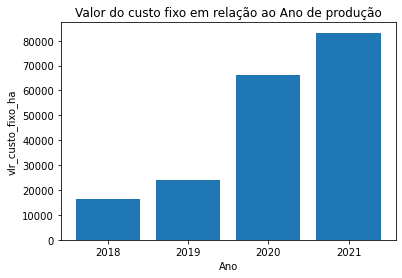

In [13]:
df_plot = df.groupby ('Ano'). vlr_custo_fixo_ha.sum (). reset_index () 

x =df_plot['Ano']
y=df_plot['vlr_custo_fixo_ha']
plt.bar(x,y);
plt.title('Valor do custo fixo em relação ao Ano de produção');
plt.xlabel('Ano');
plt.ylabel('vlr_custo_fixo_ha');
plt.xticks(x, (2018,2019,2020,2021));